In [21]:
# 鸟类数据分类

from keras.preprocessing.image import ImageDataGenerator

IMSIZE = 224
train_generator = ImageDataGenerator(rescale=1. / 255).flow_from_directory('../../data/data_vgg/train',
                                                                           target_size=(IMSIZE, IMSIZE),
                                                                           batch_size=10,
                                                                           class_mode='categorical'
                                                                           )

validation_generator = ImageDataGenerator(rescale=1. / 255).flow_from_directory('../../data/data_vgg/test',
                                                                                target_size=(IMSIZE, IMSIZE),
                                                                                batch_size=10,
                                                                                class_mode='categorical'
                                                                                )

Found 45980 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.


<Figure size 432x288 with 0 Axes>

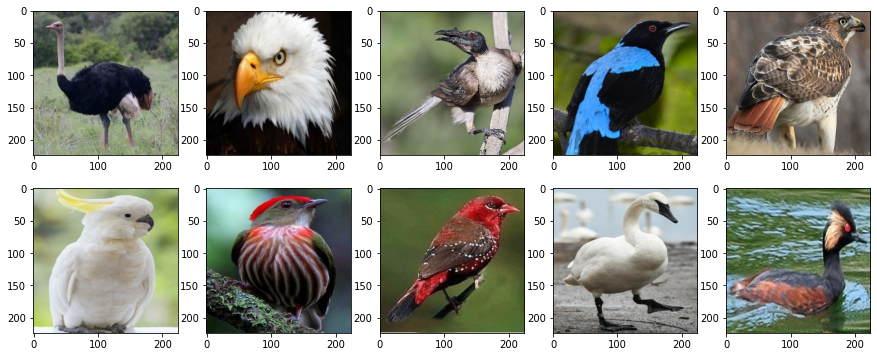

In [22]:
#图像显示
from matplotlib import pyplot as plt

plt.figure()
fig, ax = plt.subplots(2, 5)
fig.set_figheight(6)
fig.set_figwidth(15)
ax = ax.flatten()
X, Y = next(validation_generator)
for i in range(10): ax[i].imshow(X[i, :, :, ])

In [23]:
#VGG16+BN实现
#VGG16+BN模型构建
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D
from keras.layers import Flatten, Dense, Input, Activation
from keras import Model
from keras.layers import GlobalAveragePooling2D

input_shape = (IMSIZE, IMSIZE, 3)
input_layer = Input(input_shape)
x = input_layer

x = BatchNormalization(axis=3)(x)
x = Conv2D(64, [3, 3], padding="same", activation='relu')(x)
x = BatchNormalization(axis=3)(x)
x = Conv2D(64, [3, 3], padding="same", activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = BatchNormalization(axis=3)(x)
x = Conv2D(128, [3, 3], padding="same", activation='relu')(x)
x = BatchNormalization(axis=3)(x)
x = Conv2D(128, [3, 3], padding="same", activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = BatchNormalization(axis=3)(x)
x = Conv2D(256, [3, 3], padding="same", activation='relu')(x)
x = BatchNormalization(axis=3)(x)
x = Conv2D(256, [3, 3], padding="same", activation='relu')(x)
x = BatchNormalization(axis=3)(x)
x = Conv2D(256, [3, 3], padding="same", activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = BatchNormalization(axis=3)(x)
x = Conv2D(512, [3, 3], padding="same", activation='relu')(x)
x = BatchNormalization(axis=3)(x)
x = Conv2D(512, [3, 3], padding="same", activation='relu')(x)
x = BatchNormalization(axis=3)(x)
x = Conv2D(512, [3, 3], padding="same", activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = BatchNormalization(axis=3)(x)
x = Conv2D(512, [3, 3], padding="same", activation='relu')(x)
x = BatchNormalization(axis=3)(x)
x = Conv2D(512, [3, 3], padding="same", activation='relu')(x)
x = BatchNormalization(axis=3)(x)
x = Conv2D(512, [3, 3], padding="same", activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = GlobalAveragePooling2D()(x)

x = Dense(315)(x)
x = Activation('softmax')(x)
output_layer = x
model_vgg16_b = Model(input_layer, output_layer)
model_vgg16_b.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
batch_normalization_53 (Batc (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization_54 (Batc (None, 224, 224, 64)      256       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization_55 (Batc (None, 112, 112, 64)      256 

In [25]:
#vgg16模型的编译与拟合
from keras.optimizers import Adam

model_vgg16_b.compile(loss='categorical_crossentropy',
                      optimizer=Adam(lr=0.001),
                      metrics=['accuracy'])
model_vgg16_b.fit_generator(train_generator,
                            epochs=10,
                            validation_data=validation_generator)

Epoch 1/10
 235/4598 [>.............................] - ETA: 32:47 - loss: 5.7604 - accuracy: 0.0085

KeyboardInterrupt: 